In [6]:
DATA_DIR = '/lustre/groups/ml01/workspace/louis.kuemmerle/projects/A1/data2/' # "./../"
DATA_VERSION = 'oct22'
RESULTS_DIR = '/lustre/groups/ml01/workspace/louis.kuemmerle/projects/A1/results/'
SHAM = True

########################################################################################
sham_str = '_wSham' if SHAM else ''

# Dendrograms


In [2]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scanpy as sc
import anndata as ann

from scipy.sparse import csr_matrix
from matplotlib import rcParams
from matplotlib import colors

import datetime

#plt.rcParams['figure.dpi'] = 300

sc.logging.print_versions()

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 8.3.2
appnope             0.1.3
asttokens           NA
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cffi                1.15.1
colorama            0.4.6
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.3
decorator           5.1.1
defusedxml          0.7.1
entrypoints         0.4
executing           1.2.0
h5py                3.7.0
hypergeom_ufunc     NA
igraph              0.9.11
ipykernel           6.17.1
ipython_genutils    0.2.0
jedi                0.18.1
joblib              1.2.0
jupyter_server      1.23.2
kiwisolver          1.4.4
leidenalg           0.8.10
llvmlite            0.36.0
matplotlib          3.5.3
mpl_toolkits        NA
natsort             8.2.0
nbinom_ufunc        NA
ncf_ufunc           NA
numba               0.53.1
numpy               1.23.4
packaging           21.3
pandas              1.5.1
parso               0.8.3
pexpect

# Dendrograms
Compute dendrograms on full dataset under each condition (Naive, Sham, MCAO)

In [4]:
plt.rcParams['figure.dpi'] = 100

SMALL_SIZE = 17
MEDIUM_SIZE = 19
BIGGER_SIZE = 21

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [7]:
adata = sc.read(DATA_DIR+f'cellxgene_{DATA_VERSION}{sham_str}_umaps.h5ad')

In [8]:
adata.obs['region'] = adata.obs['region'].cat.rename_categories({'Skull':'Calvaria'})

### All regions

### Bones only

In [10]:
bones = ['Calvaria','Vertebra','Scapula','Humerus','Pelvis','Femur']

#### All conditions

/Users/louis.kuemmerle/opt/anaconda3/envs/bioinfo/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


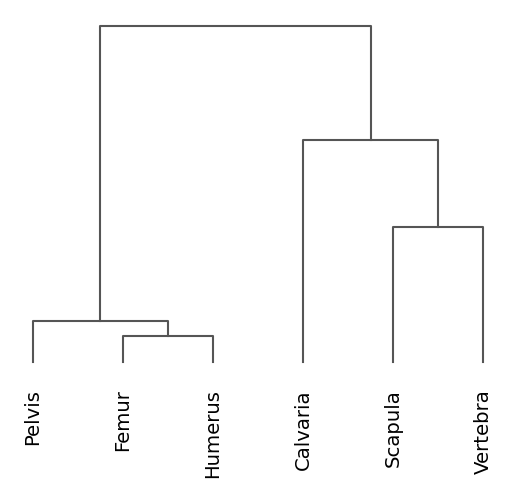

<AxesSubplot:>

In [11]:
a = adata.copy()
a = a[np.in1d(a.obs['region'],bones),:]
sc.tl.dendrogram(a,'region')
sc.pl.dendrogram(a,'region',save='_bones_AllConditions.png')

#### Naive/Sham/MCAO subsets

~~~ condition Naive ~~~


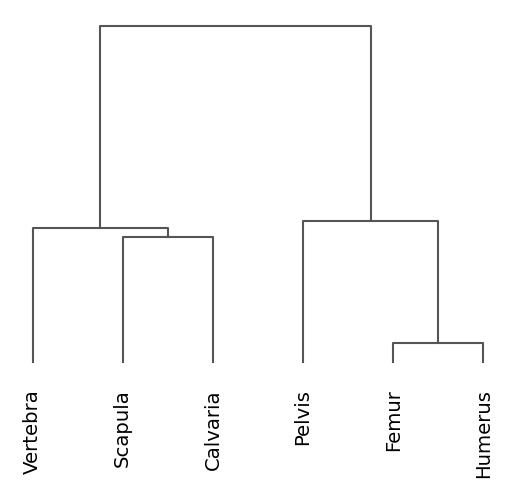

~~~ condition Sham ~~~


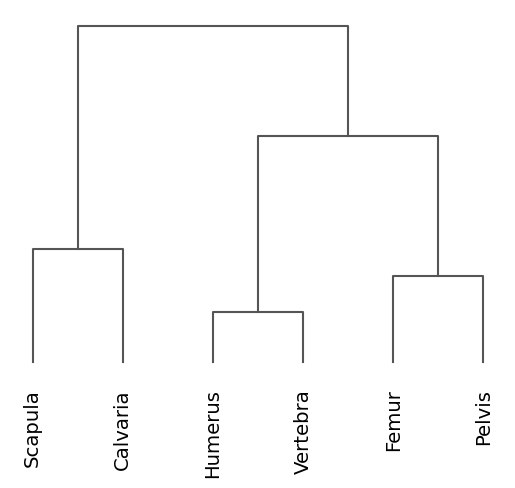

~~~ condition MCAO ~~~


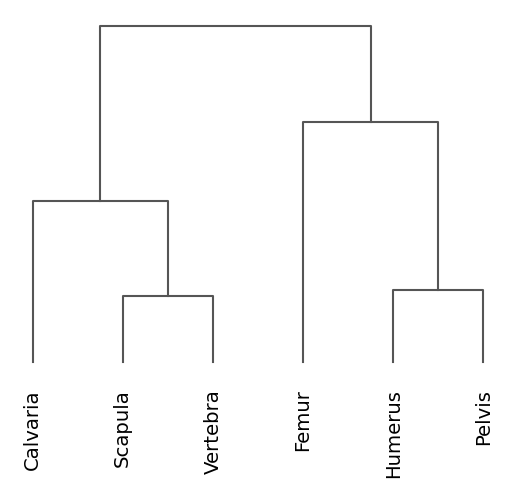

In [12]:
for c in ['Naive','Sham','MCAO']:
    print(f"~~~ condition {c} ~~~")    
    a = ann.AnnData(X=adata.X,obs=adata.obs[['region','condition']],var=adata.var[['highly_variable']])
    a = a[np.in1d(a.obs['region'],bones),:]
    a = a[a.obs['condition'] == c,:]
    sc.pp.pca(a)
    sc.tl.dendrogram(a,'region')
    sc.pl.dendrogram(a,'region',save=f'_bones_{c}_v2.png')
del a